In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

thcolor = '#44546A'

Load data:

In [22]:
models = ["homo", "2maps", "yeo"]
data = {}
opts_split = {}

for model in models:
    data[model] = cubnm_paper.data.load_all_cmaes("twins_unrelated_96", "REST1_LR", model, n_runs=2)
    # create a dataframe of optimal parameters and cost function + components
    opts_split[model] = pd.DataFrame({sub: data[model][sub]['opt'] for sub in data[model].keys()}).T
    opts_split[model]['-cost'] = -opts_split[model]['cost']
    opts_split[model]['model'] = model
    opts_split[model].index.name = 'sub'
    opts_split[model] = opts_split[model].reset_index()

opts = pd.concat(opts_split.values(), axis=0).sort_values('sub').set_index(['sub', 'model'])

Loading all CMA-ES data from /raven/u/asaberi/projects/cubnm/paper/data/hcp/sim/homo/all_cmaes_set-twins_unrelated_96_ses-REST1_LR_nruns-2.pkl
Loading all CMA-ES data from /raven/u/asaberi/projects/cubnm/paper/data/hcp/sim/2maps/all_cmaes_set-twins_unrelated_96_ses-REST1_LR_nruns-2.pkl
Loading all CMA-ES data from /raven/u/asaberi/projects/cubnm/paper/data/hcp/sim/yeo/all_cmaes_set-twins_unrelated_96_ses-REST1_LR_nruns-2.pkl


Descriptives:

In [24]:
fit_cols = ['-cost', '+fc_corr', '-fcd_ks', '+gof', '-fic_penalty']

In [25]:
opts_split['homo'][fit_cols].describe().round(3)

,-cost,+fc_corr,-fcd_ks,+gof,-fic_penalty
count,96.000,96.000,96.000,96.000,96.000
mean,0.052,0.225,-0.141,0.084,-0.032
std,0.102,0.069,0.062,0.096,0.016
min,-0.230,0.045,-0.450,-0.199,-0.071
25%,-0.010,0.179,-0.161,0.019,-0.045
50%,0.065,0.225,-0.133,0.093,-0.031
75%,0.128,0.275,-0.102,0.154,-0.020
max,0.230,0.377,-0.054,0.266,-0.000


In [27]:
opts_split['2maps'][fit_cols].describe().round(3)

,-cost,+fc_corr,-fcd_ks,+gof,-fic_penalty
count,96.000,96.000,96.000,96.000,96.000
mean,0.193,0.376,-0.159,0.217,-0.024
std,0.074,0.082,0.040,0.074,0.023
min,0.031,0.207,-0.237,0.064,-0.119
25%,0.140,0.310,-0.186,0.163,-0.028
50%,0.191,0.381,-0.163,0.215,-0.017
75%,0.240,0.438,-0.133,0.263,-0.009
max,0.402,0.531,-0.054,0.426,-0.000


In [28]:
opts_split['yeo'][fit_cols].describe().round(3)

,-cost,+fc_corr,-fcd_ks,+gof,-fic_penalty
count,96.000,96.000,96.000,96.000,96.000
mean,0.271,0.433,-0.142,0.290,-0.019
std,0.062,0.066,0.038,0.066,0.007
min,0.128,0.282,-0.211,0.143,-0.038
25%,0.232,0.389,-0.175,0.241,-0.023
50%,0.267,0.427,-0.147,0.285,-0.019
75%,0.309,0.486,-0.115,0.332,-0.014
max,0.470,0.595,-0.043,0.508,-0.004


Plot:

/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/tmp/ipykernel_23191/2916386412.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)
/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

- Cost: homo - 2maps: t = -11.672, p = 0.0, mean_diff = -0.141, sd_diff = 0.118
- Cost: homo - yeo: t = -19.463, p = 0.0, mean_diff = -0.22, sd_diff = 0.11
- Cost: 2maps - yeo: t = -17.698, p = 0.0, mean_diff = -0.079, sd_diff = 0.043


/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/tmp/ipykernel_23191/2916386412.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)
/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Goodness-of-fit: homo - 2maps: t = -11.16, p = 0.0, mean_diff = -0.133, sd_diff = 0.116
Goodness-of-fit: homo - yeo: t = -18.932, p = 0.0, mean_diff = -0.207, sd_diff = 0.106
Goodness-of-fit: 2maps - yeo: t = -17.478, p = 0.0, mean_diff = -0.074, sd_diff = 0.041


/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/tmp/ipykernel_23191/2916386412.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)


FC$_{corr}$: homo - 2maps: t = -14.169, p = 0.0, mean_diff = -0.151, sd_diff = 0.104
FC$_{corr}$: homo - yeo: t = -22.312, p = 0.0, mean_diff = -0.208, sd_diff = 0.091
FC$_{corr}$: 2maps - yeo: t = -13.934, p = 0.0, mean_diff = -0.057, sd_diff = 0.04


/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/tmp/ipykernel_23191/2916386412.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)
/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

-FCD$_{KS}$: homo - 2maps: t = 3.051, p = 0.003, mean_diff = 0.018, sd_diff = 0.057
-FCD$_{KS}$: homo - yeo: t = 0.205, p = 0.838, mean_diff = 0.001, sd_diff = 0.054
-FCD$_{KS}$: 2maps - yeo: t = -8.016, p = 0.0, mean_diff = -0.017, sd_diff = 0.02


/u/asaberi/projects/cubnm/paper/venv/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/tmp/ipykernel_23191/2916386412.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)


-FIC$_{penalty}$: homo - 2maps: t = -2.751, p = 0.007, mean_diff = -0.008, sd_diff = 0.028
-FIC$_{penalty}$: homo - yeo: t = -9.984, p = 0.0, mean_diff = -0.013, sd_diff = 0.013
-FIC$_{penalty}$: 2maps - yeo: t = -2.155, p = 0.034, mean_diff = -0.005, sd_diff = 0.024


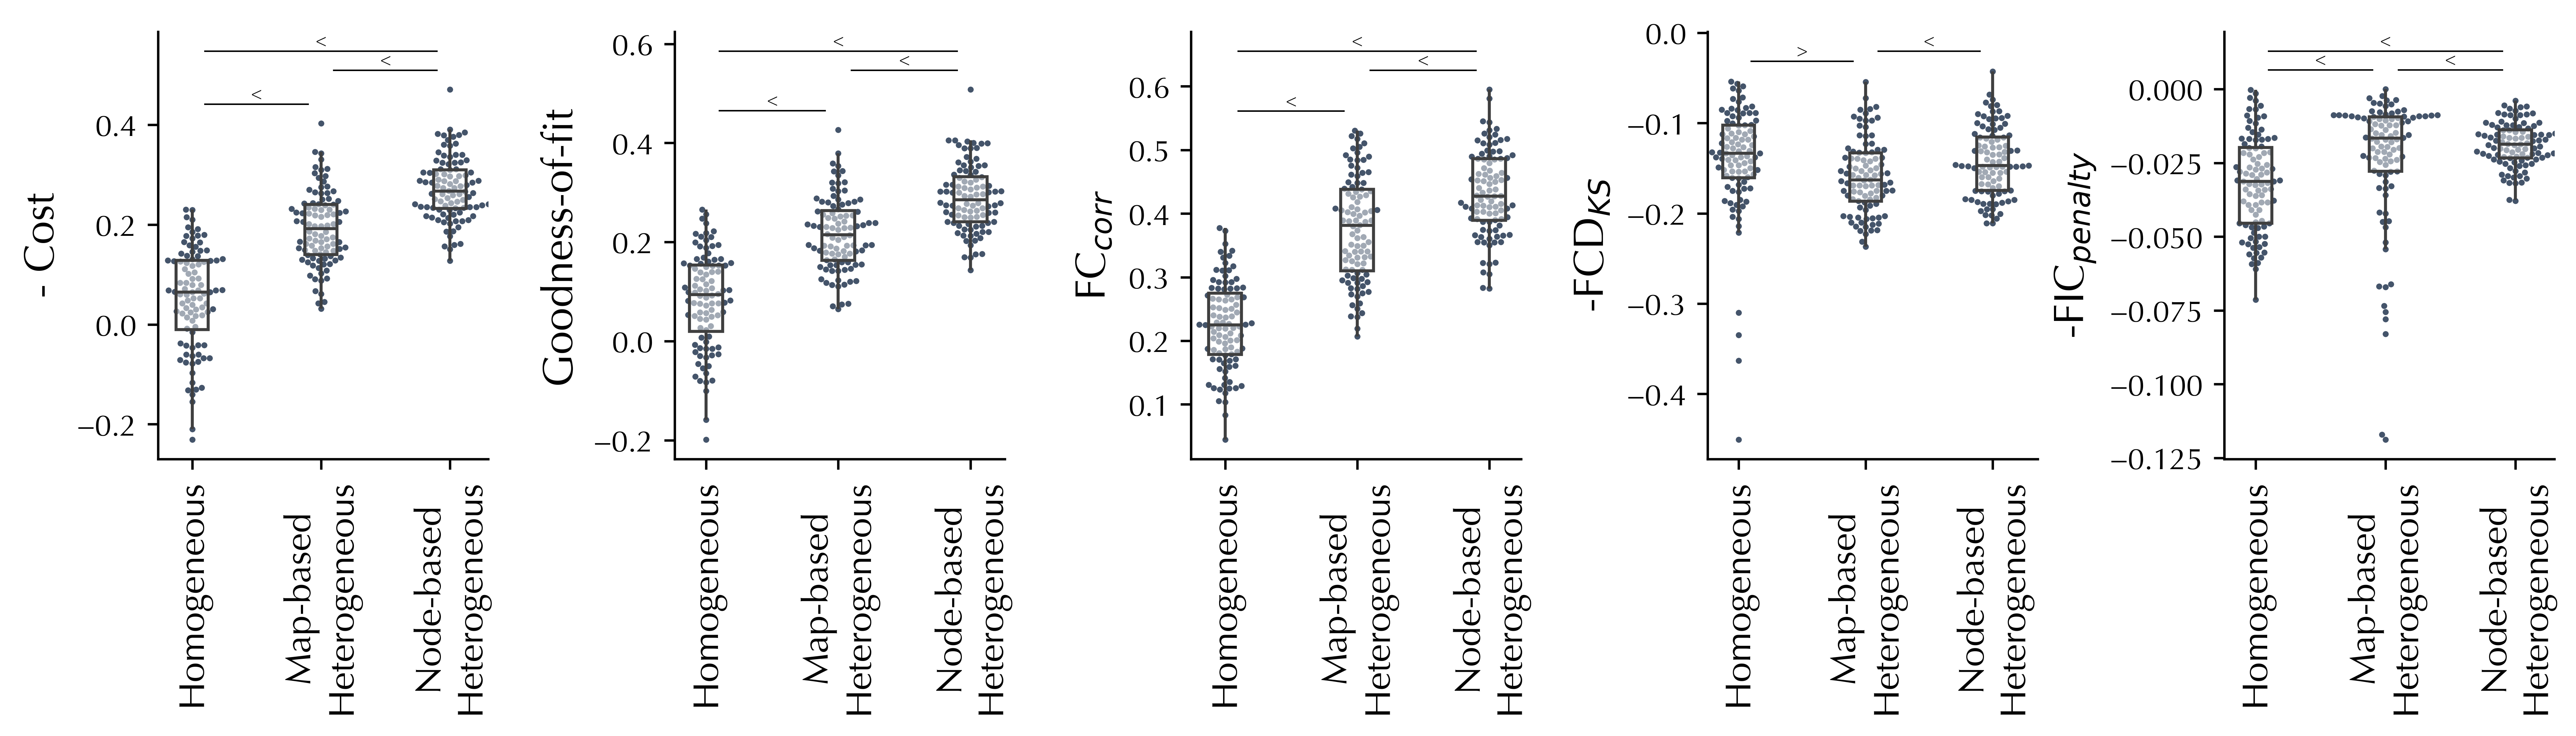

In [30]:
gof_labels = {
    '-cost': '- Cost',
    '+gof': 'Goodness-of-fit',
    '+fc_corr': r'FC$_{corr}$',
    '-fcd_ks': r'-FCD$_{KS}$',
    '-fic_penalty': r'-FIC$_{penalty}$',
}

model_labels = {
    'homo': 'Homogeneous',
    '2maps': 'Map-based\nHeterogeneous',
    'yeo': 'Node-based\nHeterogeneous'
}

fig, axd = plt.subplot_mosaic(
    [list(gof_labels.keys())],
    gridspec_kw=dict(width_ratios=[1]*5, height_ratios=[1]), 
    figsize=(12, 3.5)
)


stats_offset_p = 0.05

for i_ax, (col, label) in enumerate(gof_labels.items()):
    ax = axd[col]
    sns.swarmplot(
        data=opts,
        x='model', y=col, order=models,
        s=2, color=thcolor,
        ax=ax
    )
    sns.boxplot(
        data=opts,
        x='model', y=col, order=models,
        showfliers=False,
        showcaps=False, width=0.25,
        boxprops={"facecolor": (1, 1, 1, 0.5)},
        ax=ax
    )
    plt.setp(ax.collections, zorder=0, label="") # puts swarm in the back
    ax.set_ylabel(label, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(model_labels.values(), rotation=90, fontsize=12)
    sns.despine()
    # statistics
    ylim_range = ax.get_ylim()[1] - ax.get_ylim()[0]
    stats_offset = stats_offset_p * ylim_range
    for i_model in range(3):
        for j_model in range(3):
            if i_model >= j_model:
                continue
            model1 = models[i_model]
            model2 = models[j_model]
            t, p = scipy.stats.ttest_rel(
                opts.loc[(slice(None), model1), col],
                opts.loc[(slice(None), model2), col]
            )
            if p < 0.05:
                y = max(
                    opts.loc[(slice(None), model1), col].max(),
                    opts.loc[(slice(None), model2), col].max()
                )
                y += stats_offset * (j_model - i_model)
                ax.plot(
                    [i_model+0.10, j_model-0.10],
                    [y, y],
                    color='black',
                    lw=0.5,
                )
                x_mid = (i_model + j_model) / 2
                if t < 0:
                    text = '<'
                else:
                    text = '>'
                # text = f't = {t:.1f}*'
                ax.text(x_mid, y, text, fontsize=6, ha='center', va='bottom')
            diff = (
                opts.loc[(slice(None), model1), col].values -
                opts.loc[(slice(None), model2), col].values
            )
            print(f"{label}: {model1} - {model2}: t = {round(t, 3)}, p = {round(p,3)}, mean_diff = {round(diff.mean(), 3)}, sd_diff = {round(diff.std(), 3)}")

# plt.subplots_adjust(wspace=0.2)
fig.tight_layout()
fig.savefig('hcp_gof_comparison.png', transparent=True, bbox_inches='tight')